### Handwritten Digits Recognition with One-vs-All Classification Implementation

Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. we will show you how the methods for this
classification task.
<img src="./images/handwritten_digits.png" alt="Image for illustration purpose only" width="300" />

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat
import warnings; warnings.simplefilter('ignore')

#### Data Visualisation

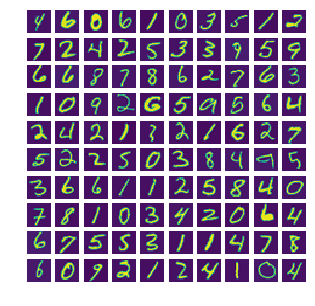

In [109]:
# Load  data
num_labels = 10
data = loadmat('./data/handwritten_digits.mat')
# Shuffle data for train/test split
#np.random.seed(4)
np.random.shuffle(s)
xy = np.append( data['X'],  data['y'], axis=1)
np.random.shuffle(xy)
train_x = xy[:4000,:-1]; train_y = xy[:4000,-1]
test_x = xy[4000:,:-1]; test_y = xy[4000:,-1]
X = train_x; y = train_y
m,n = X.shape[0], X.shape[1]
y = np.where(y==10, 0, y).reshape(m,1)
test_y = np.where(test_y==10, 0, test_y).reshape(test_y.shape[0],1)

tmp = X
tmp1 = test_x
sel = X[:100]
def  displayData(sel):
    fig, axs = plt.subplots(10, 10,figsize=(5,5))
    for i in range(10):
            for j in range(10):
                axs[i,j].imshow(sel[i*10+j].reshape(20,20).T)
                axs[i,j].axis('off')
displayData(sel)

#### Model Construction 

In [110]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1.0/(1+np.exp(-z))
    return g

def costFunctionReg(theta, X, y, lamda):
    m,n = X.shape[0], X.shape[1]
    J = 0.0
    grad= np.zeros(theta.shape)
    h =  sigmoid(X.dot(theta))
    J = 1./m*( -(np.log(h)).T.dot(y)  -  (np.log(1-h)).T.dot(1-y) ) \
        + lamda/(2*m)*(theta[1:].T.dot(theta[1:]))
    return J

def gradient(theta, X, y, lamda):
    m,n = X.shape[0], X.shape[1]
    grad= np.zeros(theta.shape)
    h =  sigmoid(X.dot(theta))
    grad = 1.0/m*(X.T).dot(h-np.squeeze(y)) + lamda/m*theta
    grad[0] = grad[0] - lamda/m*theta[0]
    return grad

def oneVsAll(X, y, num_labels, lamda):
    m,n = X.shape[0], X.shape[1]
    all_theta = np.zeros((num_labels, n))
    initial_theta = np.zeros((n,1))
    for c in range(num_labels):
        xopt = minimize(costFunctionReg, x0=initial_theta, args = (X,(y == c),lamda), jac = gradient, method='TNC', options={'disp': True, 'maxiter' : 50})
        all_theta[c,:] = xopt.x
    return all_theta

def predictOneVsAll(all_theta, X):
    return np.argmax(X.dot(all_theta.T), axis=1)


#### Accuracies

In [111]:
lamda = 0.1  # regularization parameter 
X = np.append(np.ones((m,1)), tmp, axis=1)
all_theta = oneVsAll(X, y, 10, lamda)
pred = predictOneVsAll(all_theta, X)
accu = sum([1 for i in range(m) if abs(pred[i]-y[i]) < 0.001 ])/m * 100
print('Training Set Accuracy: %.2f\n'% accu);

Training Set Accuracy: 96.45



#### Prediction

In [112]:
test_x = np.append(np.ones((test_x.shape[0],1)), tmp1, axis=1)
pred = predictOneVsAll(all_theta, test_x)
accu = np.mean([1 for i in range(test_x.shape[0]) if abs(pred[i]-test_y[i]) < 0.001 ]) * 100
print('Test Set Accuracy: %.2f\n'% accu);

Test Set Accuracy: 100.00



The number[5] below is predicted as: [5] !


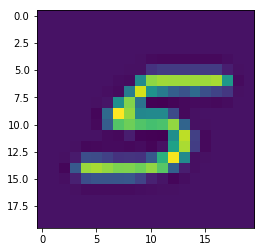

In [113]:
#Choose a image i in range 1..5000
import random
i = random.randint(0,1000)
plt.imshow(test_x[i,1:].reshape(20,20).T)
val = np.argmax(test_x[i,:].dot(all_theta.T))
print('The number[%d] below is predicted as: [%d] !' % (test_y[i], val) )